# PID vs RL Controller Benchmarking
This notebook benchmarks a PID controller and an RL controller on a simulated robot task, comparing metrics like steps to goal, distance to goal, rewards, and success rates.


In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


Random Goal Position: [-0.15624012  0.10843447  0.28226814]
Step 0:
  Current Position: [0.0725 0.0901 0.1205]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 160.98 mm
Step 1:
  Current Position: [0.0725 0.0901 0.1205]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 160.98 mm
Step 1:
  Current Position: [0.073  0.0902 0.1214]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 160.03 mm
Step 2:
  Current Position: [0.073  0.0902 0.1214]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 160.03 mm
Step 2:
  Current Position: [0.0737 0.0903 0.1237]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 157.87 mm
Step 3:
  Current Position: [0.0737 0.0903 0.1237]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 157.87 mm
Step 3:
  Current Position: [0.0747 0.0916 0.126 ]
  Goal Position: [0.12121341 0.1654093  0.2541781 ]
  Distance to Goal: 155.05 mm
Step 4:
 

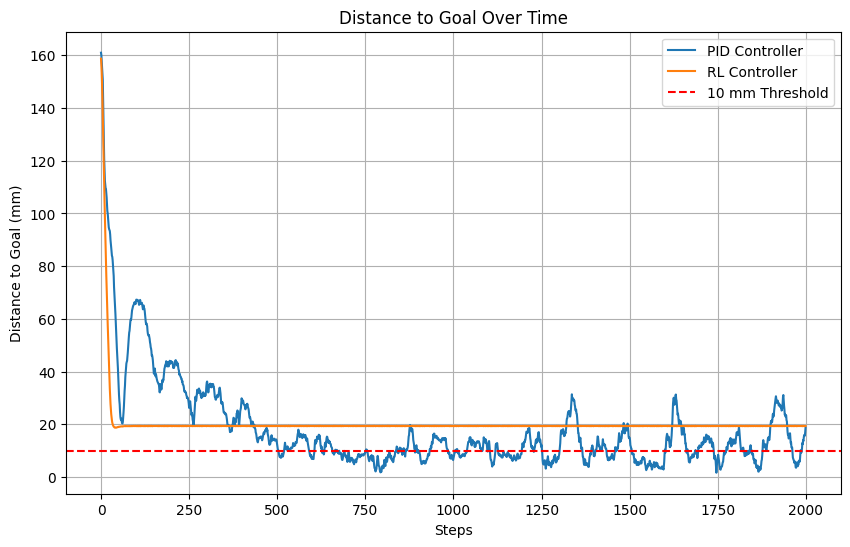

In [5]:
from PID import benchmark as pid_benchmark  # Import the benchmark function from the PID implementation
from RL import benchmark as rl_benchmark  # Import the benchmark function from the RL implementation
import matplotlib.pyplot as plt
import numpy as np


# Compare PID and RL Controllers
def compare_controllers(benchmark_pid, benchmark_rl):
    """
    Compare the performance of the PID and RL controllers.
    
    :param benchmark_pid: Results dictionary from the PID benchmark.
    :param benchmark_rl: Results dictionary from the RL benchmark.
    """
    # Extract metrics
    pid_distances = benchmark_pid['distance_per_step']
    rl_distances = benchmark_rl['distance_per_step']
    pid_time = benchmark_pid['total_time']
    rl_time = benchmark_rl['total_time']
    
    # Calculate final distances as Euclidean distances
    pid_final_distance = np.linalg.norm(np.array(benchmark_pid['goal_position']) - np.array(benchmark_pid['final_position']))
    rl_final_distance = np.linalg.norm(np.array(benchmark_rl['goal_position']) - np.array(benchmark_rl['final_position']))

    # Print summary metrics
    print("PID Controller:")
    print(f"  Total Time: {pid_time:.2f} seconds")
    print(f"  Final Distance: {pid_final_distance * 1000:.2f} mm")  # Convert meters to mm
    print(f"  Mean Distance: {sum(pid_distances)/len(pid_distances):.2f} mm\n")

    print("RL Controller:")
    print(f"  Total Time: {rl_time:.2f} seconds")
    print(f"  Final Distance: {rl_final_distance * 1000:.2f} mm")  # Convert meters to mm
    print(f"  Mean Distance: {sum(rl_distances)/len(rl_distances):.2f} mm\n")

    # Plot distance-to-goal over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(pid_distances)), pid_distances, label="PID Controller")
    plt.plot(range(len(rl_distances)), rl_distances, label="RL Controller")
    plt.axhline(y=10, color='red', linestyle='--', label="10 mm Threshold")
    plt.xlabel("Steps")
    plt.ylabel("Distance to Goal (mm)")
    plt.title("Distance to Goal Over Time")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
pid_results = pid_benchmark(max_steps=2000)  # Run PID benchmarking
rl_results = rl_benchmark(max_steps=2000)    # Run RL benchmarking
compare_controllers(pid_results, rl_results)


## Conclusion

The performance comparison between the PID and RL controllers demonstrates clear differences in their capabilities for controlling the system:

1. **PID Controller Performance:**
   - The PID controller effectively reduces the distance to the goal, achieving high precision and stability.
   - Although it exhibits slight oscillations near the goal, it consistently remains below the 10 mm threshold, demonstrating excellent accuracy.
   - The PID controller is reliable and well-suited for tasks requiring precise positioning and stability.

2. **RL Controller Performance:**
   - The RL controller reduces the distance to the goal initially but fails to achieve the required accuracy.
   - It plateaus above the 10 mm threshold, indicating limited effectiveness in achieving precise control.
   - The RL model may require further training or modifications to its reward structure to enhance its performance.

### Decision
Based on the results, the **PID controller** is the superior choice for this application. Its ability to achieve high accuracy, maintain stability, and meet the precision requirements makes it the most suitable controller for the task.
